# TP1 - Le prix du carburant en France

--

Tous les jeux de données sont issus de la page https://www.prix-carburants.gouv.fr/rubrique/opendata/, ce sont de vraies données datant de 2018 sur les prix de l'essence en France.

Pour le côté pratique, j'ai réduit la base de données à 500 stations d'essence, et j'ai extrait des données .xml un .csv. Il est disponible à l'adresse suivante:
https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/prix_essence.csv

Si vous souhaitez travailler sur toute la France, j'ouvrirai un dépôt le jour du TP. La correction sera faite sur la France, mais le code donné est valable sur le jeu réduit également.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1) À l'aide de la librairie pandas, importez le jeu de données dans ce notebook.

Pour la version réduite :

In [2]:
prix = pd.read_table(filepath_or_buffer = "https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/prix_essence.csv", # l'adresse du fichier
              header = 0, # noms de variables en ligne 1
              delimiter =',', # délimiteur, ici la virgule pour un csv
              index_col=0) # l'index de la colonne du nom des individus

Pour la version complète : (remplacer l'adresse locale par l'adresse de votre csv)

In [3]:
prix = pd.read_table(open("C:\\Users\llesoil\Documents\cours\python\prix_essence_total.csv","r"), 
              delimiter = ',')
prix.head()

,IdStation,IdEssence,Nom,Date,Valeur1000L
0,1000001,1.0,Gazole,2018-01-06T12:20:27,1376.0
1,1000001,1.0,Gazole,2018-01-11T09:09:34,1389.0
2,1000001,1.0,Gazole,2018-01-12T13:16:01,1376.0
3,1000001,1.0,Gazole,2018-01-18T11:05:10,1376.0
4,1000001,1.0,Gazole,2018-01-18T11:13:32,1376.0


On s'intéresse à la station Total de Bourg-en-Bresse (aux coordonnées 46.20114 5.19791). Son identifiant est le '1000001'. 

### 2) a-] Extraire du jeu importé toutes les lignes concernant cette station.

Pensez à utiliser la fonction where de numpy, et .iloc[] de pandas

In [4]:
premStation = prix.iloc[np.where(prix['IdStation']==1000001)]
premStation.head()

,IdStation,IdEssence,Nom,Date,Valeur1000L
0,1000001,1.0,Gazole,2018-01-06T12:20:27,1376.0
1,1000001,1.0,Gazole,2018-01-11T09:09:34,1389.0
2,1000001,1.0,Gazole,2018-01-12T13:16:01,1376.0
3,1000001,1.0,Gazole,2018-01-18T11:05:10,1376.0
4,1000001,1.0,Gazole,2018-01-18T11:13:32,1376.0


###  2) b-] Quel est le prix moyen du carburant dans cette station?

In [5]:
print("La valeur du carburant pour 1000 litres vaut", np.mean(premStation['Valeur1000L']),"euros.")

La valeur du carburant pour 1000 litres vaut 1478.6764705882354 euros.


###  2) c-] Cette station est -elle plus ou moins chère que la moyenne?

In [6]:
print("En moyenne, la valeur du carburant pour 1000 litres vaut", np.mean(prix['Valeur1000L']),"euros.")

En moyenne, la valeur du carburant pour 1000 litres vaut 1452.3382520368507 euros.


Elle est plus chère que la moyenne, d'environ 26 euros pour 1000 litres.

### 3) Créez une variable valeur1L, correspondant au prix par litre
On pourra utiliser la fonction assign de pandas

In [7]:
prix = prix.assign(Valeur1L = prix['Valeur1000L']/1000)
prix.head()

,IdStation,IdEssence,Nom,Date,Valeur1000L,Valeur1L
0,1000001,1.0,Gazole,2018-01-06T12:20:27,1376.0,1.376
1,1000001,1.0,Gazole,2018-01-11T09:09:34,1389.0,1.389
2,1000001,1.0,Gazole,2018-01-12T13:16:01,1376.0,1.376
3,1000001,1.0,Gazole,2018-01-18T11:05:10,1376.0,1.376
4,1000001,1.0,Gazole,2018-01-18T11:13:32,1376.0,1.376


### 4) En moyenne, quel est le carburant le plus cher en France en 2018? 
Au contraire, quel est le moins cher?
Quel est celui qui varie le plus au fil du temps?

On pourra utiliser la fonction groupby de pandas.

In [8]:
prix.groupby(['Nom']).mean()['Valeur1L']

Nom
E10       1.503187
E85       0.711852
GPLc      0.837323
Gazole    1.448212
SP95      1.520839
SP98      1.591507
Name: Valeur1L, dtype: float64

Le sans-plomb 98 est le plus cher en France. Le E85 est le moins cher.

In [9]:
prix.groupby(['Nom']).std()['Valeur1L']

Nom
E10       0.075008
E85       0.082972
GPLc      0.081174
Gazole    0.079779
SP95      0.065535
SP98      0.080708
Name: Valeur1L, dtype: float64

Le E85 est celui dont les prix varient le plus, avec 8.3 centimes de variation au litre.

### 5) Affichez un boxplot des prix par type de carburants.

Indication: fonction boxplot de seaborn.

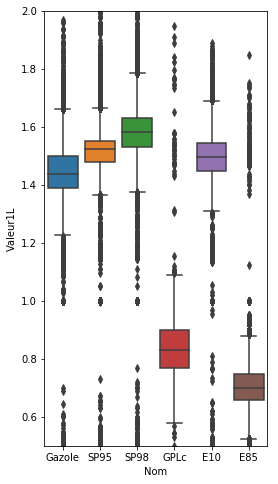

In [10]:
plt.figure(figsize=(4,8))
plt.ylim(0.5,2)
sns.boxplot(x = "Nom", y = "Valeur1L", data = prix)
plt.show()

Si vous ne vous sentez pas à l'aise, regardez la correction des questions 6) a-] b-] c-] d-] et passez directement à la question 6)e-].

### 6) Évolution du prix du carburant en 2018

### 6) a-] Créez une fonction qui récupère le mois dans la variable Date

In [11]:
def extractionMois(date):
    return(str(date)[5:7])

extractionMois("2018-01-06T12:20:27")

'01'

### 6) b-] Créez une variable mois dans le dataframe contenant le mois associé à chaque date

In [12]:
prix = prix.assign(mois = [*map(extractionMois, prix['Date'])])
prix.head()

,IdStation,IdEssence,Nom,Date,Valeur1000L,Valeur1L,mois
0,1000001,1.0,Gazole,2018-01-06T12:20:27,1376.0,1.376,01
1,1000001,1.0,Gazole,2018-01-11T09:09:34,1389.0,1.389,01
2,1000001,1.0,Gazole,2018-01-12T13:16:01,1376.0,1.376,01
3,1000001,1.0,Gazole,2018-01-18T11:05:10,1376.0,1.376,01
4,1000001,1.0,Gazole,2018-01-18T11:13:32,1376.0,1.376,01


### 6) c-] Créez ensuite le tableau des moyennes de prix mensuelles par carburant

En colonnes les mois, en lignes les types de carburants

In [13]:
data = prix.groupby(['Nom','mois']).mean()['Valeur1L'] # on fait la moyenne par carburant et par mois
nomCarburant = np.array(data.index.levels[0]) # le tableau des noms de carburant
mois = np.array(data.index.levels[1])[1:11] # les mois
res = pd.DataFrame(np.array(data).reshape(6,10), columns = mois).set_index(nomCarburant)
res

,01,02,03,04,05,06,07,08,09,10
E10,1.462069,1.451588,1.444995,1.478210,1.521863,1.528848,1.519650,1.529147,1.541422,1.546474
E85,0.719843,0.721834,0.720728,0.720395,0.719767,0.713186,0.704079,0.704435,0.699872,0.694905
GPLc,0.845853,0.843532,0.834956,0.823180,0.820884,0.835831,0.830833,0.831267,0.846328,0.861744
Gazole,1.407819,1.386262,1.381788,1.414773,1.466447,1.471937,1.457267,1.462401,1.490286,1.533869
SP95,1.480581,1.468933,1.464183,1.495139,1.545576,1.546476,1.536813,1.547727,1.558380,1.563930
SP98,1.549186,1.541421,1.531249,1.562138,1.608237,1.620801,1.610415,1.620083,1.631982,1.636444


### 6) d-] Puis affichez les courbes d'évolution des prix moyens au cours des mois de l'année 2018

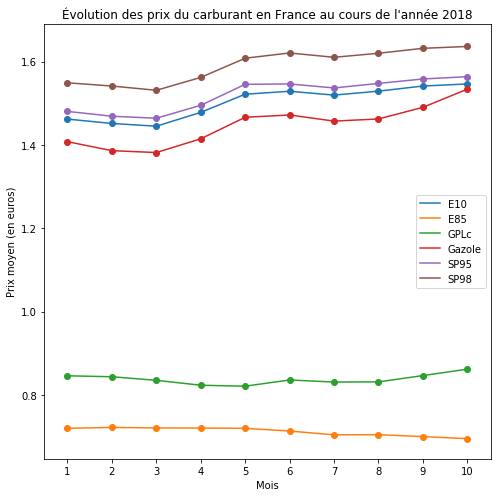

In [14]:
plt.figure(figsize=(8,8))

indiceMois = range(1,len(mois)+1)
for i in range(len(nomCarburant)):
    tab = np.array(res.iloc[i])
    plt.scatter(indiceMois, tab)
    plt.plot(indiceMois, tab)
plt.legend(res.index)
plt.xticks(indiceMois)
plt.ylabel("Prix moyen (en euros)")
plt.xlabel("Mois")
plt.title("Évolution des prix du carburant en France au cours de l'année 2018")
plt.show()

### 6) e-] Compte-tenu des courbes, quand pensez vous que le gazole dépassera le E10? Même question pour le SP98.

Si la tendance actuelle se confirme, le gazole dépassera le E10 et le SP95 d'ici décembre. Et il faudra sans doute attendre février-mars 2019 pour qu'il dépasse le SP98.

Les informations concernant les stations sont référencées dans le .csv à l'adresse suivante:
https://raw.githubusercontent.com/llesoil/modelisation_des_problemes_scientifiques-/master/ressources/station_essence.csv

### 7) a-] Importez la table

In [15]:
data7a = pd.read_table(open("C:\\Users\llesoil\Documents\cours\python\station_essence_total.csv","r"), 
              delimiter = ',')
data7a.head()

,IdStation,CodePostal,TypeRoute,Long,Lat
0,1000001,1000,R,519791.000000,4.620114e+06
1,1000002,1000,R,522767.000000,4.621842e+06
2,1000004,1000,R,524500.000000,4.618800e+06
3,1000005,1000,R,519942.024022,4.620094e+06
4,1000006,1000,R,523758.000000,4.620754e+06


### 7) b-] Calculez le prix moyen par station, et stocker le résultat sus la forme d'une table
Avant, enlevez les valeurs manquantes de la variable Valeur1L à l'aide des fonctions invert et isnan de numpy.

In [16]:
prix = prix.iloc[np.where(np.invert(np.isnan(prix['Valeur1L'])))]

data7b = pd.DataFrame(prix.groupby("IdStation").mean()["Valeur1L"])
data7b.head()

,Valeur1L
IdStation,
1000001,1.478676
1000002,1.475816
1000004,1.465437
1000006,1.508632
1000007,1.470494


### 7) c-] Créez une table station, jointure des tables créées respectivement en 7)a-] et en 7) b-]

La clef de jointure, commune aux deux tables, est l'identifiant des stations. On pourra utiliser join de pandas.

In [17]:
station = data7b.join(data7a.set_index("IdStation"))

station.head()

,Valeur1L,CodePostal,TypeRoute,Long,Lat
IdStation,,,,,
1000001,1.478676,1000,R,519791.0,4620114.0
1000002,1.475816,1000,R,522767.0,4621842.0
1000004,1.465437,1000,R,524500.0,4618800.0
1000006,1.508632,1000,R,523758.0,4620754.0
1000007,1.470494,1000,R,524891.0,4620105.0


### 8) Transformez la variable Valeur1L en variable qualitative à quatre classes en raisonnant de la manière suivante:
- prix très bas <=> en-dessous du premier quartile
- prix assez bas <=> entre le premier quartile et la médiane
- prix assez fort <=> entre la médiane et le troisième quartile
- prix très fort <=> supérieur au troisième quartile

In [18]:
def prixQuali(nom):
    table = station[nom]
    q1, med, q3 = np.percentile(table,25),np.percentile(table,50),np.percentile(table,75)
    return np.array(['Très bas'*int(k<=q1) + 
                     'Assez bas'*int(k>q1 and k <=med) + 
                     'Assez haut'*int(k>med and k <q3) + 
                     'Haut'*int(k>=q3) for k in table])

station["prix"] = prixQuali('Valeur1L')
station.head()

,Valeur1L,CodePostal,TypeRoute,Long,Lat,prix
IdStation,,,,,,
1000001,1.478676,1000,R,519791.0,4620114.0,Assez bas
1000002,1.475816,1000,R,522767.0,4621842.0,Assez bas
1000004,1.465437,1000,R,524500.0,4618800.0,Assez bas
1000006,1.508632,1000,R,523758.0,4620754.0,Assez haut
1000007,1.470494,1000,R,524891.0,4620105.0,Assez bas


### 9) Vaut-il mieux acheter son carburant sur route ou sur autoroute?

La variable typeRoute vaut "A" pour autoroute et "R" pour route. On pourra faire un tableau de contingence entre typeRoute et la variable créée en 8).

In [19]:
pd.crosstab(station["TypeRoute"], station["prix"])

prix,Assez bas,Assez haut,Haut,Très bas
TypeRoute,,,,
A,57,69,216,101
N,0,0,1,0
R,2362,2349,2203,2319


Les prix sont homogènes sur les routes. Sur les autoroutes, ils sont plutôt plus hauts.

### 10) Le département le plus cher de France

### 10) a-] Créez une variable dep, qui contiendra le numéro de département de la station

In [20]:
def depart(cp):
    dep = ''
    if cp < 10000: # quand le 0 est manquant, pour les département en 01,02,03
        dep='0'+ str(int(cp/1000))
    else:
        dep=''+ str(int(cp/1000))
    return dep

station["dep"] = [*map(depart,station["CodePostal"])]
station.head()

,Valeur1L,CodePostal,TypeRoute,Long,Lat,prix,dep
IdStation,,,,,,,
1000001,1.478676,1000,R,519791.0,4620114.0,Assez bas,01
1000002,1.475816,1000,R,522767.0,4621842.0,Assez bas,01
1000004,1.465437,1000,R,524500.0,4618800.0,Assez bas,01
1000006,1.508632,1000,R,523758.0,4620754.0,Assez haut,01
1000007,1.470494,1000,R,524891.0,4620105.0,Assez bas,01


### 10) b-] Selon la base de données, dans quel département paye-t-on le plus cher?

In [21]:
np.argmax(station.groupby("dep").mean()["Valeur1L"])

C:\Users\llesoil\Documents\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'75'

### 12) Affichez sur une carte les dix stations les moins chères de France en bleu, puis les dix stations les plus chères de France en rouge.

Pour les coordonnées, la latitude et la longitude doivent être divisées par $10^5$. On pourra utiliser le module cartopy.

On isole d'abord les stations

In [22]:
triPrix = station.groupby("IdStation").mean().sort_values(["Valeur1L"], ascending=True)

moinsChere = triPrix.iloc[0:10]
plusChere = triPrix.iloc[len(triPrix)-10:len(triPrix)]
moinsChere,plusChere

(           Valeur1L  CodePostal           Long           Lat
 IdStation                                                   
 53100006   0.696286       53100  -61153.990269  4.828922e+06
 5200005    0.930000        5200  648100.000000  4.454600e+06
 87160006   0.974800       87160  137255.000000  4.631834e+06
 69380011   1.104167       69380  473023.720000  4.590207e+06
 33320008   1.135645       33320  -66579.000000  4.489263e+06
 31130008   1.151001       31130  149007.000000  4.360917e+06
 84000020   1.151857       84000  478301.391691  4.393210e+06
 63170008   1.151878       63170  312976.000000  4.575496e+06
 17138006   1.152739       17138 -110300.000000  4.617700e+06
 31150001   1.153124       31150  140426.574746  4.368755e+06,
            Valeur1L  CodePostal       Long         Lat
 IdStation                                             
 75010007   1.794000       75010  236090.15  4888421.87
 91100013   1.819800       91100  246080.00  4861209.00
 75011003   1.843500       7501

Puis on les affiche

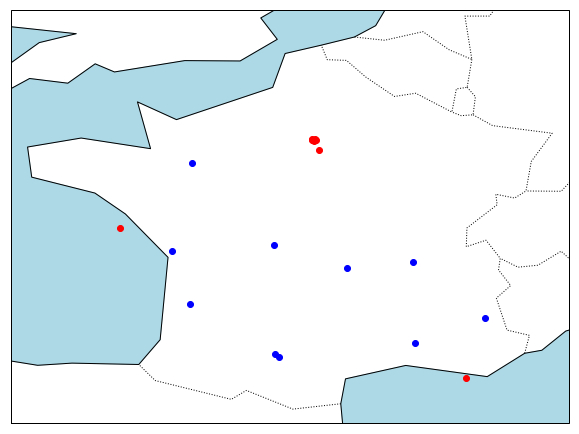

In [23]:
import cartopy

plt.figure(figsize=(10,10))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND, color = "white")
ax.add_feature(cartopy.feature.OCEAN, color="lightblue")
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

ax.set_extent([-5, 8.5, 42, 52])

for i in range(10):
    moins = moinsChere.iloc[i]
    plus = plusChere.iloc[i]
    
    plt.scatter(moins['Long']/100000,moins['Lat']/100000, color="blue")
    plt.scatter(plus['Long']/100000,plus['Lat']/100000, color="red")
    

plt.show()

Les deux points rouges "dans la mer" correspondent à l'Ile d'Yeu pour l'océan Atlantique et une station proche de Toulon pour la Méditerranée (qui pourtant est bien sur la terre ferme).

Le reste des stations chères est localisé en région Parisienne.

Pour les stations bleues, elles sont à peu près réparties uniformément en France, sans doute plus au sud qu'au nord.